In [10]:
import os
# set wd

#Set your own data files path here
#path = "d:\cyk\gatech\CSE6242\ProjectCSE6242\ProjectUKdata"
path = "d:\gatech\CSE6242\Project\data"
os.chdir(path)

### Import Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Import all data

In [12]:
#data source : https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales/version/8
df2005_07 = pd.read_csv("accidents_2005_to_2007.csv",low_memory=False)
df2009_11 = pd.read_csv("accidents_2009_to_2011.csv",low_memory=False)
df2012_14 = pd.read_csv("accidents_2012_to_2014.csv",low_memory=False)
df2014_lon = pd.read_csv("accidents_london_district1-32_2014.csv",low_memory=False)
dfaadf = pd.read_csv("ukTrafficAADF.csv")
clust = pd.read_csv("cluster_output.csv")
df500clust = pd.read_csv("accidents_london_district2014w500clust.csv")

#Union the 3 files into 1 mega file and reset index
df_all = pd.concat([df2005_07,df2009_11,df2012_14]).reset_index(drop=True)

#df2005_07.head()

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
Accident_Index                                 1504150 non-null object
Location_Easting_OSGR                          1504049 non-null float64
Location_Northing_OSGR                         1504049 non-null float64
Longitude                                      1504049 non-null float64
Latitude                                       1504049 non-null float64
Police_Force                                   1504150 non-null int64
Accident_Severity                              1504150 non-null int64
Number_of_Vehicles                             1504150 non-null int64
Number_of_Casualties                           1504150 non-null int64
Date                                           1504150 non-null object
Day_of_Week                                    1504150 non-null int64
Time                                           1504033 non-null object
Local_Authority_(District)          

### Basic EDA
#### Histograms of Numeric Variables

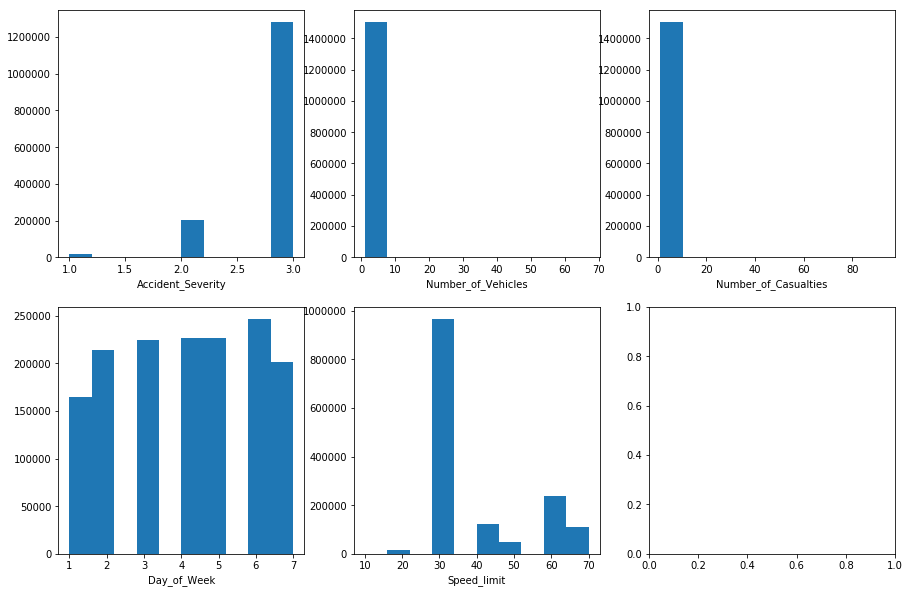

In [7]:
#EDA - Histogram of numeric vars
cols = ["Accident_Severity","Number_of_Vehicles","Number_of_Casualties","Day_of_Week","Speed_limit"]

f,a = plt.subplots(2,3,figsize=(15,10))
a = a.ravel()

for idx, ax in  enumerate(a):
    if idx < 5:
        ax.hist(df_all[cols[idx]],bins=10)
        #ax.set_title(cols[idx])
        ax.set_xlabel(cols[idx])
        # ax.set_ylabel(yaxes[idx])


Definition of Accident Severity:
1: Fatal
2: Serious
3: Slight

#### Count plots of Categorical Variables

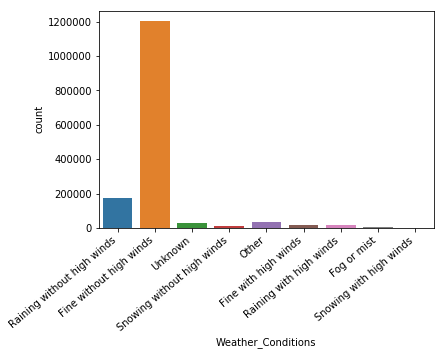

In [9]:
# start with weather conditions first
wplot = sns.countplot(data=df_all,x="Weather_Conditions")
wplot.set_xticklabels(wplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

Most Accidents happened during fine weather!

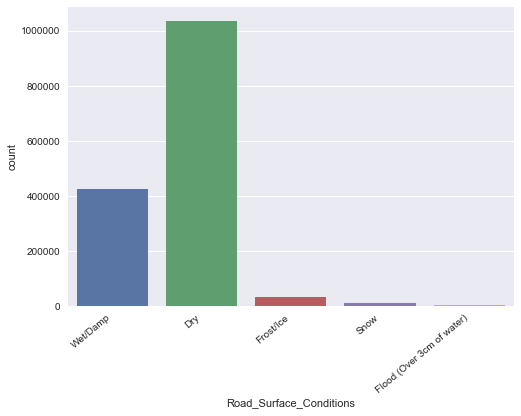

In [7]:
# start with weather conditions first
rplot = sns.countplot(data=df_all,x="Road_Surface_Conditions")
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

### Data Cleaning

In [9]:
# This is the 2014 London accident data with Cluster id mapped. 
df500clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3758 entries, 0 to 3757
Data columns (total 23 columns):
Accident_Index                             3758 non-null object
Location_Easting_OSGR                      3758 non-null int64
Location_Northing_OSGR                     3758 non-null int64
Longitude                                  3758 non-null float64
Latitude                                   3758 non-null float64
Cluster                                    3758 non-null int64
Date                                       3758 non-null object
Day_of_year                                3758 non-null int64
Day_of_Week                                3758 non-null int64
Time                                       3758 non-null object
Hour                                       3758 non-null int64
Local_Authority_(District)                 3758 non-null int64
1st_Road_Class                             3758 non-null int64
1st_Road_Number                            3758 non-null int64
Road

### Generate Negative Samples (Non-accident data)

In [21]:
df_nonacc = pd.DataFrame(columns=['Cluster','Day_of_year','Hour'])

i = 1
maxclust = df500clust['Cluster'].max()

random.seed(888)

while i < df500clust.shape[0]*3:   #3 times more non-accident than accident records
#while i < 50:   #try 50 times first
#   random generate values for 3 variables
    nday = random.randint(1, 365)
    nclust = random.randint(1, maxclust)  #maximum cluster id
    nhr = random.randint(0, 23)
#   whether such record exist first    
    isacc = df500clust.loc[(df500clust['Cluster'] == nclust) & (df500clust['Day_of_year'] == nday) & (df500clust['Hour'] == nhr)]
    if isacc.empty:
        i += 1
        dfnew = pd.DataFrame([[nclust,nday,nhr]], columns=['Cluster','Day_of_year','Hour'])
        df_nonacc = df_nonacc.append(dfnew,ignore_index=True)
    else:
        print([nclust,nday,nhr])
        print("Accident found!")

df_nonacc.to_csv("non_accident2014.csv")

[387, 222, 2]
Accident found!
[90, 307, 14]
Accident found!
[299, 351, 9]
Accident found!
[241, 238, 8]
Accident found!
[91, 315, 9]
Accident found!
[236, 9, 17]
Accident found!
[85, 80, 15]
Accident found!
[438, 83, 12]
Accident found!
[62, 105, 18]
Accident found!
[290, 315, 14]
Accident found!
[55, 274, 9]
Accident found!
[481, 281, 7]
Accident found!


### Negative Samples Generation    